http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pf

In [145]:
!pip install pandas_profiling

  Running setup.py bdist_wheel for pandas-profiling: started
  Running setup.py bdist_wheel for pandas-profiling: finished with status 'done'
  Stored in directory: C:\Users\nisha\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Running setup.py bdist_wheel for htmlmin: started
  Running setup.py bdist_wheel for htmlmin: finished with status 'done'
  Stored in directory: C:\Users\nisha\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Running setup.py bdist_wheel for confuse: started
  Running setup.py bdist_wheel for confuse: finished with status 'done'
  Stored in directory: C:\Users\nisha\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,0.688738,0.573390,0.884241,-0.629595
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018
2013-01-04,-0.614550,0.839883,-0.724903,-0.954928
2013-01-05,1.757623,0.266875,1.253312,0.359760
2013-01-06,-1.343441,0.761915,1.233179,-0.738626


In [147]:
df.profile_report()

Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.688738,0.573390,0.884241,-0.629595
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018
2013-01-04,-0.614550,0.839883,-0.724903,-0.954928
2013-01-05,1.757623,0.266875,1.253312,0.359760


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.614550,0.839883,-0.724903,-0.954928
2013-01-05,1.757623,0.266875,1.253312,0.359760
2013-01-06,-1.343441,0.761915,1.233179,-0.738626


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.68873825,  0.57338979,  0.88424083, -0.62959549],
       [ 2.44301548,  0.81049082,  2.12297603,  0.26678087],
       [-0.879851  ,  0.98899545, -0.63367653, -0.80201758],
       [-0.61455044,  0.83988279, -0.7249034 , -0.95492823],
       [ 1.75762272,  0.26687498,  1.25331234,  0.35975959],
       [-1.34344071,  0.76191549,  1.23317852, -0.73862594]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.341922,0.706925,0.689188,-0.416438
std,1.535389,0.253956,1.136449,0.575700
min,-1.343441,0.266875,-0.724903,-0.954928
25%,-0.813526,0.620521,-0.254197,-0.786170
50%,0.037094,0.786203,1.058710,-0.684111
75%,1.490402,0.832535,1.248279,0.042687
max,2.443015,0.988995,2.122976,0.359760


Transposing your data

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.688738,2.443015,-0.879851,-0.614550,1.757623,-1.343441
B,0.573390,0.810491,0.988995,0.839883,0.266875,0.761915
C,0.884241,2.122976,-0.633677,-0.724903,1.253312,1.233179
D,-0.629595,0.266781,-0.802018,-0.954928,0.359760,-0.738626


Sorting by an axis

In [20]:
df.sort_index(axis='columns', ascending=False)

,D,C,B,A
2013-01-01,-0.629595,0.884241,0.573390,0.688738
2013-01-02,0.266781,2.122976,0.810491,2.443015
2013-01-03,-0.802018,-0.633677,0.988995,-0.879851
2013-01-04,-0.954928,-0.724903,0.839883,-0.614550
2013-01-05,0.359760,1.253312,0.266875,1.757623
2013-01-06,-0.738626,1.233179,0.761915,-1.343441


Sorting by value

In [21]:
df.sort_values(by='C')

,A,B,C,D
2013-01-04,-0.614550,0.839883,-0.724903,-0.954928
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018
2013-01-01,0.688738,0.573390,0.884241,-0.629595
2013-01-06,-1.343441,0.761915,1.233179,-0.738626
2013-01-05,1.757623,0.266875,1.253312,0.359760
2013-01-02,2.443015,0.810491,2.122976,0.266781


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01    0.688738
2013-01-02    2.443015
2013-01-03   -0.879851
2013-01-04   -0.614550
2013-01-05    1.757623
2013-01-06   -1.343441
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.688738,0.573390,0.884241,-0.629595
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018


In [24]:
df['20130101':'20130104']

,A,B,C,D
2013-01-01,0.688738,0.573390,0.884241,-0.629595
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018
2013-01-04,-0.614550,0.839883,-0.724903,-0.954928


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A    0.688738
B    0.573390
C    0.884241
D   -0.629595
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.688738,0.573390
2013-01-02,2.443015,0.810491
2013-01-03,-0.879851,0.988995
2013-01-04,-0.614550,0.839883
2013-01-05,1.757623,0.266875
2013-01-06,-1.343441,0.761915


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,2.443015,0.810491
2013-01-03,-0.879851,0.988995
2013-01-04,-0.614550,0.839883


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A    2.443015
B    0.810491
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

0.688738246313486

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -0.614550
B    0.839883
C   -0.724903
D   -0.954928
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.614550,0.839883
2013-01-05,1.757623,0.266875


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,2.443015,2.122976
2013-01-03,-0.879851,-0.633677
2013-01-05,1.757623,1.253312


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.573390,0.884241
2013-01-02,0.810491,2.122976
2013-01-03,0.988995,-0.633677
2013-01-04,0.839883,-0.724903
2013-01-05,0.266875,1.253312
2013-01-06,0.761915,1.233179


For getting a value explicitly

In [35]:
df.iloc[1,1]

0.8104908167015543

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

0.8104908167015543

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.688738,0.573390,0.884241,-0.629595
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-05,1.757623,0.266875,1.253312,0.359760


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,0.688738,0.573390,0.884241,NaN
2013-01-02,2.443015,0.810491,2.122976,0.266781
2013-01-03,NaN,0.988995,NaN,NaN
2013-01-04,NaN,0.839883,NaN,NaN
2013-01-05,1.757623,0.266875,1.253312,0.359760
2013-01-06,NaN,0.761915,1.233179,NaN


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,0.688738,0.573390,0.884241,-0.629595,one
2013-01-02,2.443015,0.810491,2.122976,0.266781,one
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018,two
2013-01-04,-0.614550,0.839883,-0.724903,-0.954928,three
2013-01-05,1.757623,0.266875,1.253312,0.359760,four
2013-01-06,-1.343441,0.761915,1.233179,-0.738626,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.879851,0.988995,-0.633677,-0.802018,two
2013-01-05,1.757623,0.266875,1.253312,0.359760,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.884241,5,NaN
2013-01-02,2.443015,0.810491,2.122976,5,1.0
2013-01-03,-0.879851,0.988995,-0.633677,5,2.0
2013-01-04,-0.614550,0.839883,-0.724903,5,3.0
2013-01-05,1.757623,0.266875,1.253312,5,4.0
2013-01-06,-1.343441,0.761915,1.233179,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.884241,-5,NaN
2013-01-02,-2.443015,-0.810491,-2.122976,-5,-1.0
2013-01-03,-0.879851,-0.988995,-0.633677,-5,-2.0
2013-01-04,-0.614550,-0.839883,-0.724903,-5,-3.0
2013-01-05,-1.757623,-0.266875,-1.253312,-5,-4.0
2013-01-06,-1.343441,-0.761915,-1.233179,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.884241,5,NaN,1.0
2013-01-02,2.443015,0.810491,2.122976,5,1.0,1.0
2013-01-03,-0.879851,0.988995,-0.633677,5,2.0,NaN
2013-01-04,-0.614550,0.839883,-0.724903,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,2.443015,0.810491,2.122976,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.884241,5,5.0,1.0
2013-01-02,2.443015,0.810491,2.122976,5,1.0,1.0
2013-01-03,-0.879851,0.988995,-0.633677,5,2.0,5.0
2013-01-04,-0.614550,0.839883,-0.724903,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A    0.227133
B    0.611360
C    0.689188
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    1.471060
2013-01-02    2.275296
2013-01-03    1.295094
2013-01-04    1.500086
2013-01-05    2.455562
2013-01-06    2.130331
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.879851,-0.011005,-1.633677,4.0,1.0
2013-01-04,-3.614550,-2.160117,-3.724903,2.0,0.0
2013-01-05,-3.242377,-4.733125,-3.746688,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.884241,5,NaN
2013-01-02,2.443015,0.810491,3.007217,10,1.0
2013-01-03,1.563164,1.799486,2.373540,15,3.0
2013-01-04,0.948614,2.639369,1.648637,20,6.0
2013-01-05,2.706237,2.906244,2.901949,25,10.0
2013-01-06,1.362796,3.668160,4.135128,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    3.786456
B    0.988995
C    2.847879
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    2
1    5
2    5
3    0
4    2
5    2
6    0
7    2
8    0
9    5
dtype: int32

In [68]:
s.value_counts()

2    4
5    3
0    3
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,-0.690777,1.570153,1.907857,1.737575
1,-1.849647,-0.583688,0.211584,-0.415543
2,-0.108401,2.124153,-1.669677,-0.558908
3,0.137367,1.070750,1.905434,2.192350
4,0.104290,0.357615,0.551457,-0.522172
5,-0.280732,-0.366234,0.438552,-0.355351
6,-1.350517,1.037583,0.008557,-0.898388
7,-0.074838,0.105052,0.343722,1.791140
8,0.778516,1.240355,0.051996,0.276066
9,1.666083,-1.503448,-0.266628,0.376320


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.690777,1.570153,1.907857,1.737575
1,-1.849647,-0.583688,0.211584,-0.415543
2,-0.108401,2.124153,-1.669677,-0.558908
3,0.137367,1.070750,1.905434,2.192350
4,0.104290,0.357615,0.551457,-0.522172
5,-0.280732,-0.366234,0.438552,-0.355351
6,-1.350517,1.037583,0.008557,-0.898388
7,-0.074838,0.105052,0.343722,1.791140
8,0.778516,1.240355,0.051996,0.276066
9,1.666083,-1.503448,-0.266628,0.376320


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,1.768924,0.222431,-0.509903,-0.722123
1,0.190639,-1.449232,-1.636566,-1.242193
2,1.512773,0.739435,-1.559453,-0.008131
3,-0.828074,-1.326583,-0.850059,-0.088038
4,0.605780,-0.333281,2.118930,-1.044438
5,-0.711033,-0.038070,-0.467291,-0.542775
6,1.030016,-0.764131,-0.096691,0.090953
7,1.506097,-0.120729,-0.132383,-0.629414


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.768924,0.222431,-0.509903,-0.722123
1,0.190639,-1.449232,-1.636566,-1.242193
2,1.512773,0.739435,-1.559453,-0.008131
3,-0.828074,-1.326583,-0.850059,-0.088038
4,0.605780,-0.333281,2.118930,-1.044438
5,-0.711033,-0.038070,-0.467291,-0.542775
6,1.030016,-0.764131,-0.096691,0.090953
7,1.506097,-0.120729,-0.132383,-0.629414
8,-0.828074,-1.326583,-0.850059,-0.088038


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,-1.262542,1.330864
1,bar,one,1.231623,0.567469
2,foo,two,1.663827,-0.905196
3,bar,three,-2.196032,1.047545
4,foo,two,-0.574007,-0.462448
5,bar,two,-0.288898,-0.740148
6,foo,one,-0.045794,-1.315801
7,foo,three,0.459675,2.061995


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.253307,0.874865
foo,0.241159,0.709414


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.231623  0.567469
    three -2.196032  1.047545
    two   -0.288898 -0.740148
foo one   -1.308336  0.015063
    three  0.459675  2.061995
    two    1.089820 -1.367644

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.409611 -0.470412
      two     0.579698 -1.563480
baz   one    -1.140128  0.715082
      two     0.705607 -2.032282

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.409611
               B   -0.470412
       two     A    0.579698
               B   -1.563480
baz    one     A   -1.140128
               B    0.715082
       two     A    0.705607
               B   -2.032282
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.409611 -0.470412
      two     0.579698 -1.563480
baz   one    -1.140128  0.715082
      two     0.705607 -2.032282

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.409611  0.579698
      B -0.470412 -1.563480
baz   A -1.140128  0.705607
      B  0.715082 -2.032282

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.409611 -1.140128
       B -0.470412  0.715082
two    A  0.579698  0.705607
       B -1.563480 -2.032282

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,-1.396149,1.067496
1,one,B,foo,0.861452,1.024838
2,two,C,foo,-0.357874,-0.169306
3,three,A,bar,-1.803248,0.347671
4,one,B,bar,-0.271736,1.402157
5,one,C,bar,0.670942,-0.735102
6,two,A,foo,0.052598,1.159011
7,three,B,foo,0.203987,-1.199200
8,one,C,foo,-0.325978,-0.356533
9,one,A,bar,-1.246016,0.466482


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.246016 -1.396149
      B -0.271736  0.861452
      C  0.670942 -0.325978
three A -1.803248       NaN
      B       NaN  0.203987
      C  0.221451       NaN
two   A       NaN  0.052598
      B -1.644946       NaN
      C       NaN -0.357874

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    24301
Freq: 5T, dtype: int32

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06   -1.177434
2012-03-07   -1.596739
2012-03-08   -1.072002
2012-03-09    0.099885
2012-03-10    1.034692
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00   -1.177434
2012-03-07 00:00:00+00:00   -1.596739
2012-03-08 00:00:00+00:00   -1.072002
2012-03-09 00:00:00+00:00    0.099885
2012-03-10 00:00:00+00:00    1.034692
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.177434
2012-03-06 19:00:00-05:00   -1.596739
2012-03-07 19:00:00-05:00   -1.072002
2012-03-08 19:00:00-05:00    0.099885
2012-03-09 19:00:00-05:00    1.034692
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.032415
2012-02-29    0.894273
2012-03-31    0.203209
2012-04-30   -1.673059
2012-05-31   -1.231836
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.032415
2012-02    0.894273
2012-03    0.203209
2012-04   -1.673059
2012-05   -1.231836
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.032415
2012-02-01    0.894273
2012-03-01    0.203209
2012-04-01   -1.673059
2012-05-01   -1.231836
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00   -2.150531
1990-06-01 09:00    0.008032
1990-09-01 09:00   -0.386307
1990-12-01 09:00   -0.435112
1991-03-01 09:00   -0.507325
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

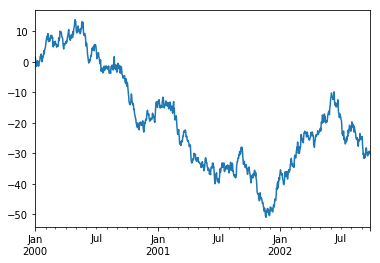

In [130]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

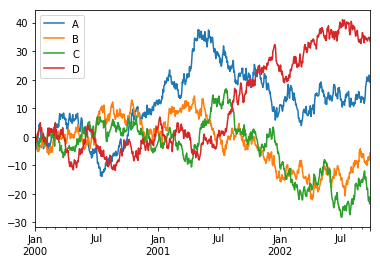

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.313016,0.229005,0.067549,-0.665987
1,2000-01-02,-1.829878,0.706978,-0.364847,-1.106488
2,2000-01-03,-2.945089,0.805593,0.061482,-1.366365
3,2000-01-04,-3.535259,-0.841942,-1.368462,-0.521629
4,2000-01-05,-3.795655,-0.891698,-2.007299,-1.412730
5,2000-01-06,-4.412031,-1.738461,-1.016180,-0.389200
6,2000-01-07,-2.533251,-3.216858,-0.900694,-0.358564
7,2000-01-08,-2.222163,-5.265919,-1.353048,0.535659
8,2000-01-09,-0.946667,-5.219451,-2.186961,1.478547
9,2000-01-10,0.782017,-5.053349,-2.626552,0.906318


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.313016,0.229005,0.067549,-0.665987
2000-01-02,-1.829878,0.706978,-0.364847,-1.106488
2000-01-03,-2.945089,0.805593,0.061482,-1.366365
2000-01-04,-3.535259,-0.841942,-1.368462,-0.521629
2000-01-05,-3.795655,-0.891698,-2.007299,-1.412730
2000-01-06,-4.412031,-1.738461,-1.016180,-0.389200
2000-01-07,-2.533251,-3.216858,-0.900694,-0.358564
2000-01-08,-2.222163,-5.265919,-1.353048,0.535659
2000-01-09,-0.946667,-5.219451,-2.186961,1.478547
2000-01-10,0.782017,-5.053349,-2.626552,0.906318


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.313016,0.229005,0.067549,-0.665987
1,2000-01-02,-1.829878,0.706978,-0.364847,-1.106488
2,2000-01-03,-2.945089,0.805593,0.061482,-1.366365
3,2000-01-04,-3.535259,-0.841942,-1.368462,-0.521629
4,2000-01-05,-3.795655,-0.891698,-2.007299,-1.412730
5,2000-01-06,-4.412031,-1.738461,-1.016180,-0.389200
6,2000-01-07,-2.533251,-3.216858,-0.900694,-0.358564
7,2000-01-08,-2.222163,-5.265919,-1.353048,0.535659
8,2000-01-09,-0.946667,-5.219451,-2.186961,1.478547
9,2000-01-10,0.782017,-5.053349,-2.626552,0.906318


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.